In [1]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from src.JacobianVisualizer import *
from src.JacobianComputer import compute_jacobian

# Compare IC and XAI Based Feature Importance

### **Needs to be generalized⬇️**
These plotting functions just needs to ingest different labels for labeling purposes, they are already pretty well structured for any dataset. Although, they pretty robustly need to have four parameters for slicing Jacobian, and needs to be ironed out. 

## **1. Load Results**

Load spectral grid, Jacobians, and SHAP values.

In [2]:
# Load or create reference data path
__dataset_path__ = os.getenv("TelescopeML_reference_data")
__folder__ = "training_datasets"

# DataFrame with cols grid points then spectra
__dataset_file__ = "browndwarf_R100_v4_newWL_v3.csv.bz2"
dataset = pd.read_csv(os.path.join(__dataset_path__,__folder__,__dataset_file__), compression='bz2')

# Wavelength grid of model
__wavelength_file__ = "wl.csv"
wl = pd.read_csv(os.path.join(__dataset_path__,__folder__,__wavelength_file__)).to_numpy().squeeze()

parameters = np.array(['temperature','gravity','c_o_ratio','metallicity'])

In [3]:
# load jacobians
matrices_dict = {}
for wrt in parameters:
    matrix = np.load(f'../jacobians/{wrt}_matrix.npy', allow_pickle=True)
    matrices_dict[wrt] = matrix

In [4]:
# load SHAP
shap_dict = {}
for wrt in parameters:
    shap_values = np.load(f'../shap_values/spectrum_shap_{wrt}.npy', allow_pickle=True)
    shap_dict[wrt] = shap_values

## **2. Overlaid Spectral Feature Importance by Parameter**

Compare the feature importance between the global views given XAI to the local views given by IC.

### Temperature

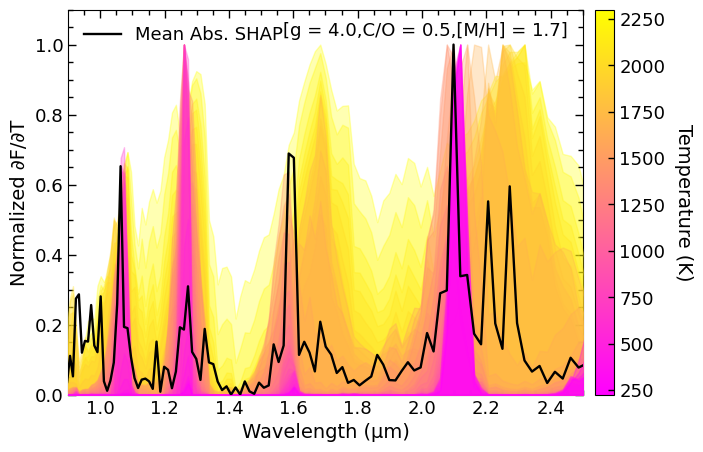

In [5]:
wrt='temperature'
gp_plot = np.sort(dataset[wrt].unique())[1:-1]

compare_IC_ML(matrices_dict[wrt],
              wrt,
              wl,
              gp_plot,
              dataset,
              shap_dict[wrt],
              const_dict = {'temperature':1100,
                'gravity': 4.0,
                'c_o_ratio':0.5,
                'metallicity':1.7},
              cmap=plt.cm.spring,
              reverse_cmap = False,
              reverse_zorder = True,
              alpha=0.3,
              plot_jacob_lines = False,
              line_alpha=0.8,
              __save__=False,
             )

### Gravity

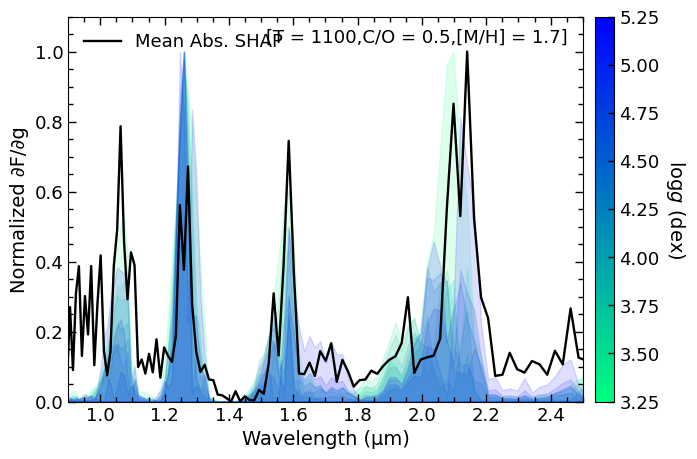

In [7]:
wrt='gravity'
gp_plot = np.sort(dataset[wrt].unique())[1:-1]

compare_IC_ML(matrices_dict[wrt],
              wrt,
              wl,
              gp_plot,
              dataset,
              shap_dict[wrt],
              const_dict = {'temperature':1100,
                'gravity': 4.0,
                'c_o_ratio':0.5,
                'metallicity':1.7},
              cmap=plt.cm.winter,
              reverse_cmap = True,
              reverse_zorder = False,
              alpha=0.13,
              plot_jacob_lines = False,
              line_alpha=0.8,
              __save__=False,
             )

### Metallicity

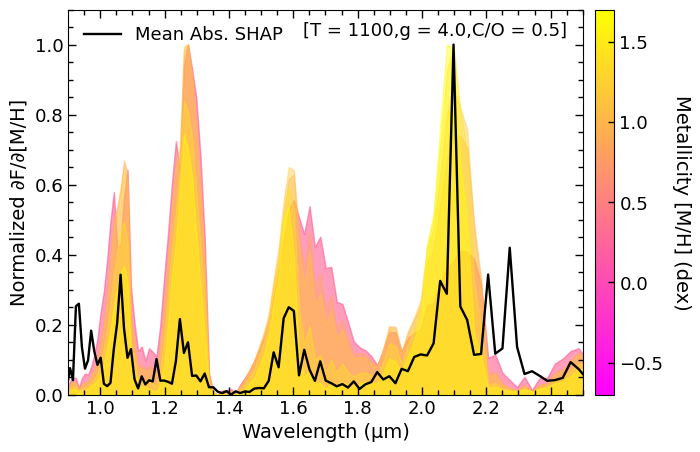

In [9]:
wrt='metallicity'
gp_plot = np.sort(dataset[wrt].unique())[1:-1]

compare_IC_ML(matrices_dict[wrt],
              wrt,
              wl,
              gp_plot,
              dataset,
              shap_dict[wrt],
              const_dict = {'temperature':1100,
                'gravity': 4.0,
                'c_o_ratio':0.5,
                'metallicity':1.7},
              cmap=plt.cm.spring,
              reverse_cmap = False,
              reverse_zorder = False,
              alpha=0.4,
              plot_jacob_lines = False,
              line_alpha=0.8,
              __save__=False,
             )

### C/O Ratio

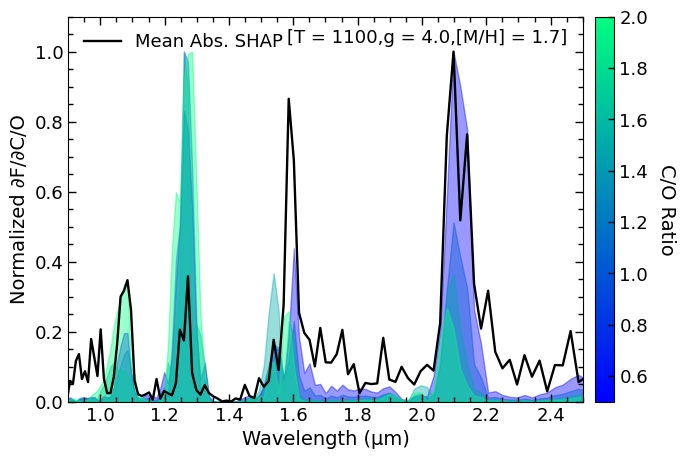

In [8]:
wrt='c_o_ratio'
gp_plot = np.sort(dataset[wrt].unique())[1:-1]

compare_IC_ML(matrices_dict[wrt],
              wrt,
              wl,
              gp_plot,
              dataset,
              shap_dict[wrt],
              const_dict = {'temperature':1100,
                'gravity': 4.0,
                'c_o_ratio':0.5,
                'metallicity':1.7},
              cmap=plt.cm.winter,
              reverse_cmap = False,
              reverse_zorder = False,
              alpha=0.4,
              plot_jacob_lines = False,
              line_alpha=0.8,
              __save__=False,
             )

## **3. Heatmap with XAI Peaks**

Look at a snapshot of model sensitivy at a given gridpoint as a function of parameter and wavelength.

### Temperature

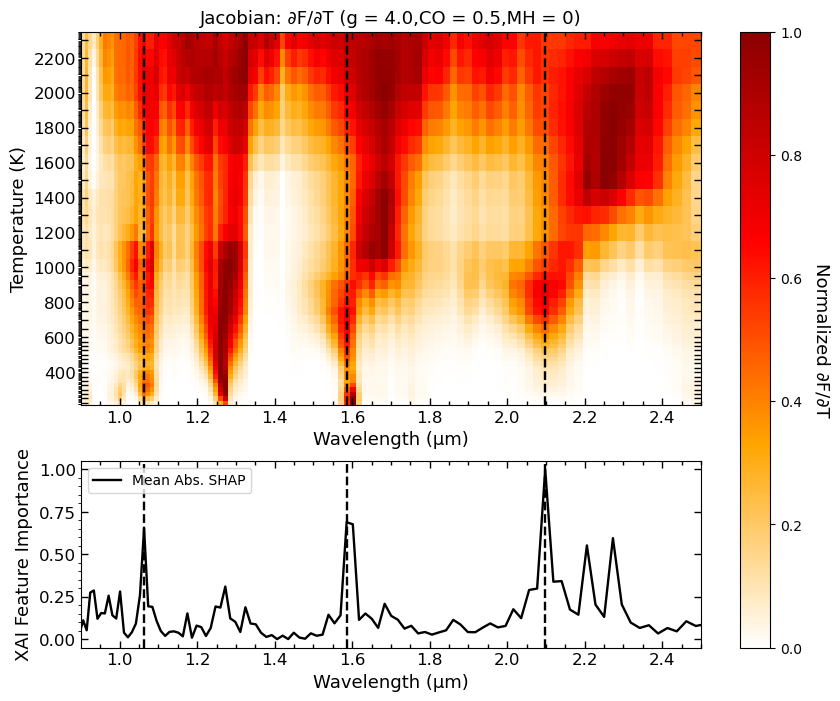

In [10]:
wrt = "temperature"

heatmap_vs_XAI(matrices_dict[wrt],
               wrt,
               wl,
               dataset,
               shap_dict[wrt],
               parameters = parameters,
               const_dict = {'temperature':800,
                            'gravity':4.0,
                            'c_o_ratio':0.5,
                            'metallicity':0},
              )

### Gravity

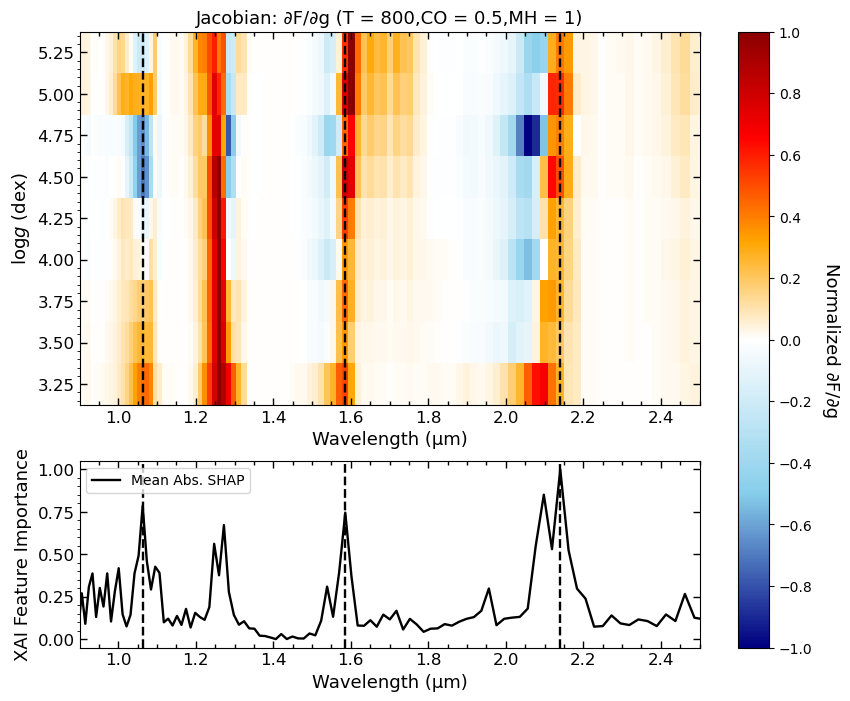

In [11]:
wrt = "gravity"

heatmap_vs_XAI(matrices_dict[wrt],
               wrt,
               wl,
               dataset,
               shap_dict[wrt],
               parameters = parameters,
               const_dict = {'temperature':800,
                            'gravity':4.0,
                            'c_o_ratio':0.5,
                            'metallicity':1},
              )

### Metallicity

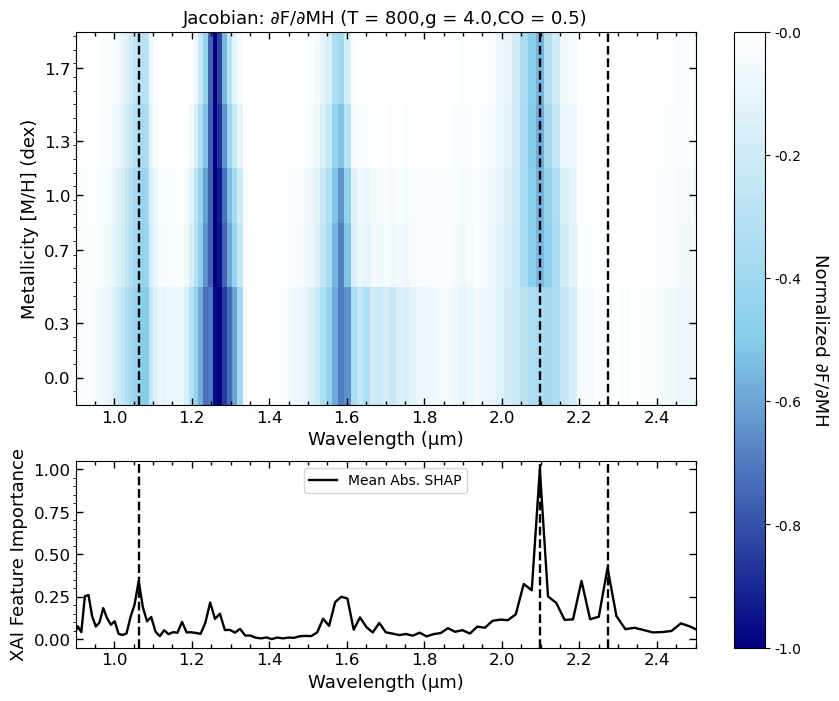

In [12]:
wrt = "metallicity"

heatmap_vs_XAI(matrices_dict[wrt],
               wrt,
               wl,
               dataset,
               shap_dict[wrt],
               parameters = parameters,
               const_dict = {'temperature':800,
                            'gravity':4.0,
                            'c_o_ratio':0.5,
                            'metallicity':1},
              )

### C/O Ratio

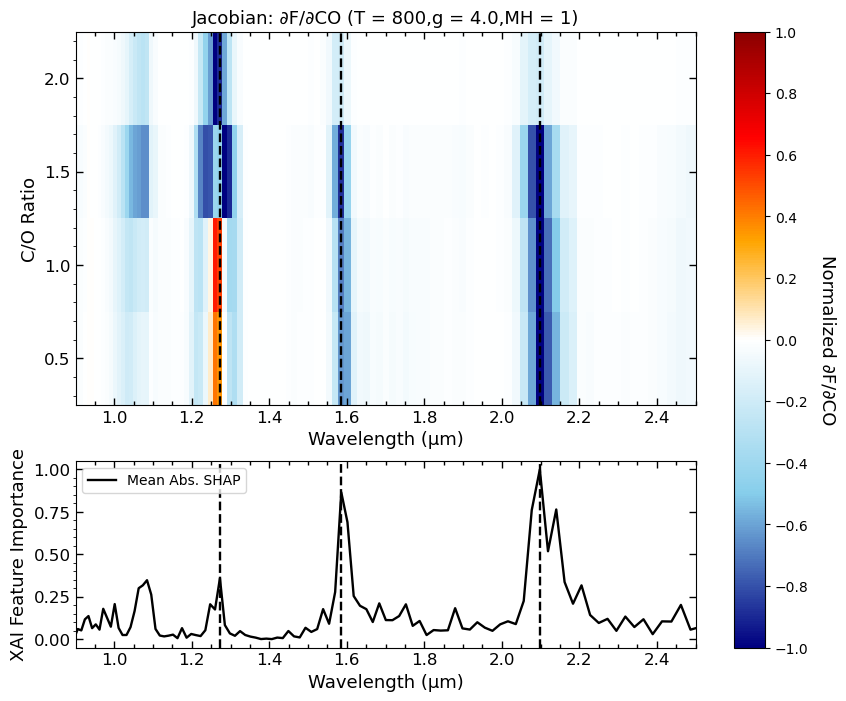

In [13]:
wrt = "c_o_ratio"

heatmap_vs_XAI(matrices_dict[wrt],
               wrt,
               wl,
               dataset,
               shap_dict[wrt],
               parameters = parameters,
               const_dict = {'temperature':800,
                            'gravity':4.0,
                            'c_o_ratio':0.5,
                            'metallicity':1},
              )